In [112]:
import numpy as np
import tt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy as sp
import scipy.sparse
import scipy.sparse.linalg

import pyrectmesh as rectmesh

%matplotlib inline

# 1D case

Consider a 1D case:
$$
    f(x) = 
        \begin{cases} 
            e^{a_1 x}\quad x\in [-2, 0], \\
            e^{a_2 x}\quad x\in [0, 2].
        \end{cases}
$$

(0, 1.1)

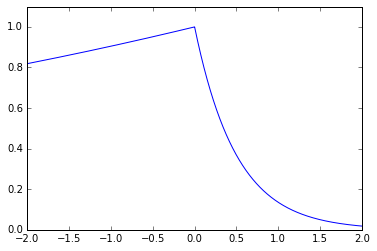

In [2]:
d = 15
n = 2 ** d
x = np.linspace(-2, 2, n)
f = np.zeros(n)

a1 = 0.1
a2 = -2.0
f[:n/2] = np.exp(a1 * x[:n/2])
f[n/2:] = np.exp(a2 * x[n/2:])

plt.plot(x, f)
plt.ylim([0, 1.1])

In [3]:
f_qtt = tt.tensor(f.reshape([2]*d))
print f_qtt

This is a 15-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=2, n(2)=2 
r(3)=2, n(3)=2 
r(4)=2, n(4)=2 
r(5)=2, n(5)=2 
r(6)=2, n(6)=2 
r(7)=2, n(7)=2 
r(8)=2, n(8)=2 
r(9)=2, n(9)=2 
r(10)=2, n(10)=2 
r(11)=2, n(11)=2 
r(12)=2, n(12)=2 
r(13)=2, n(13)=2 
r(14)=2, n(14)=2 
r(15)=1 



Thus, all QTT ranks are bounded by $2$ with machine precision

# 2D case

In [94]:
d = 8
n = 2 ** d
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 2, n)
X, Y = np.meshgrid(x, y)

from numba import jit # to speed up loops

### Exponent
$$
    f(x, y) = e^{\alpha(x^2 + y^2)}
$$

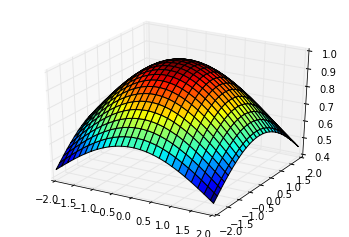

In [206]:
def myexp(x, y, R, alpha):
    n = len(x)
    m = len(y)
    xx, yy = np.meshgrid(x, y)
    f = np.exp(alpha * (xx**2 + yy**2))
    return f

f = myexp(x, y, 1, -0.1)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f, cmap=cm.jet)

In [207]:
f_qtt = tt.tensor(f.reshape([2]*(2*d), order='f'), 1e-5)
print f_qtt

This is a 16-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=3, n(2)=2 
r(3)=3, n(3)=2 
r(4)=3, n(4)=2 
r(5)=4, n(5)=2 
r(6)=4, n(6)=2 
r(7)=2, n(7)=2 
r(8)=1, n(8)=2 
r(9)=2, n(9)=2 
r(10)=3, n(10)=2 
r(11)=3, n(11)=2 
r(12)=3, n(12)=2 
r(13)=4, n(13)=2 
r(14)=4, n(14)=2 
r(15)=2, n(15)=2 
r(16)=1 



### Exponent with two parts
$$
    f(x, y) = 
        \begin{cases}
            e^{\alpha(x^2 + y^2)}, \quad & x^2 + y^2 > 1 \\
            2e^{\alpha} - e^{\alpha(x^2 + y^2)}, \quad & x^2 + y^2 \leq 1
        \end{cases}
$$

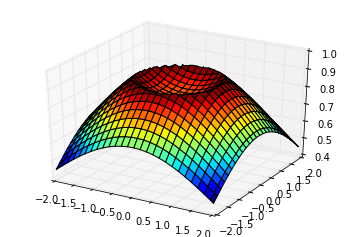

In [204]:
@jit
def myexp(x, y, R, alpha):
    n = len(x)
    m = len(y)
    xx, yy = np.meshgrid(x, y)
    f = np.exp(alpha * (xx**2 + yy**2))
    for i in xrange(n):
        for j in xrange(n):
            if (x[i]**2 + y[j]**2) <= R**2:
                f[i, j] = 2*np.exp(alpha * R**2) - np.exp(alpha * (x[i]**2 + y[j]**2))
    return f

f = myexp(x, y, 1, -0.1)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f, cmap=cm.jet)

In [205]:
f_qtt = tt.tensor(f.reshape([2]*(2*d), order='f'), 1e-5)
print f_qtt

This is a 16-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=4, n(2)=2 
r(3)=8, n(3)=2 
r(4)=16, n(4)=2 
r(5)=32, n(5)=2 
r(6)=62, n(6)=2 
r(7)=79, n(7)=2 
r(8)=40, n(8)=2 
r(9)=53, n(9)=2 
r(10)=34, n(10)=2 
r(11)=19, n(11)=2 
r(12)=11, n(12)=2 
r(13)=7, n(13)=2 
r(14)=4, n(14)=2 
r(15)=2, n(15)=2 
r(16)=1 



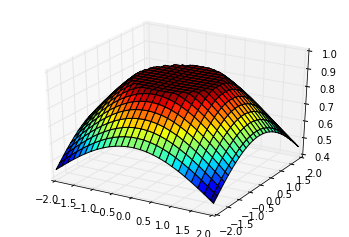

In [202]:
@jit
def myexp(x, y, R, alpha):
    n = len(x)
    m = len(y)
    xx, yy = np.meshgrid(x, y)
    f = np.exp(alpha * (xx**2 + yy**2))
    for i in xrange(n):
        for j in xrange(n):
            if (x[i]**2 + y[j]**2) <= R**2:
                f[i, j] = np.exp(alpha * R**2)
    return f

f = myexp(x, y, 1., -0.1)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f, cmap=cm.jet)

In [203]:
f_qtt = tt.tensor(f.reshape([2]*(2*d), order='f'), 1e-5)
print f_qtt

This is a 16-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=4, n(2)=2 
r(3)=8, n(3)=2 
r(4)=16, n(4)=2 
r(5)=32, n(5)=2 
r(6)=59, n(6)=2 
r(7)=78, n(7)=2 
r(8)=40, n(8)=2 
r(9)=52, n(9)=2 
r(10)=33, n(10)=2 
r(11)=19, n(11)=2 
r(12)=11, n(12)=2 
r(13)=7, n(13)=2 
r(14)=4, n(14)=2 
r(15)=2, n(15)=2 
r(16)=1 



So, ranks are huge. Note that if polar coordinates are used, then there is still low-rank structure.

### Square contour via Poisson equation

Calculating the LU decomposition...
Accomplished


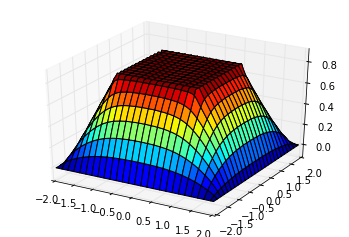

In [200]:
k = np.ones((n, n))
ns = n/4
k[ns:n-ns, ns:n-ns] = 10.**4

nodes = np.array([[0, 0], 
                   [0, n-1], 
                   [n-1, n-1],
                   [n-1, 0],
                   [0, 0]])

boundary = [['D', 0.], ['D', 0.], ['D', 0.], ['D', 0.]]
mesh = rectmesh.rectmesh(meshx=x, meshy=y, nodes=nodes, boundary=boundary)

mesh.create_boundary()
mesh.create_order()


rhs = np.ones((n, n))
lu = build_matrix(mesh, (k, k))
f = build_rhs(mesh, rhs)

sol = lu.solve(f)
fp = tomeshorder(mesh, sol)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, -fp, cmap=cm.jet)

In [201]:
f_qtt = tt.tensor(fp.reshape([2]*(2*d), order='f'), 1e-4)
print f_qtt

This is a 16-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=3, n(2)=2 
r(3)=4, n(3)=2 
r(4)=5, n(4)=2 
r(5)=7, n(5)=2 
r(6)=8, n(6)=2 
r(7)=13, n(7)=2 
r(8)=10, n(8)=2 
r(9)=18, n(9)=2 
r(10)=18, n(10)=2 
r(11)=18, n(11)=2 
r(12)=13, n(12)=2 
r(13)=8, n(13)=2 
r(14)=4, n(14)=2 
r(15)=2, n(15)=2 
r(16)=1 



Hence, if contour is square, then ranks are smaller

In [150]:
def build_matrix(mesh, coef):
    A = sp.sparse.lil_matrix((mesh.mask_nnz, mesh.mask_nnz))
    x = mesh.x
    y = mesh.y
    order = mesh.order
    order_inv = dict((v,k) for k, v in order.iteritems())
    #f = np.zeros(mesh.mask_nnz)
    
    #dx_f = x[1:mesh.size[0]-1] - x[:mesh.size[0]-2]
    
    for k in xrange(mesh.num_inside):
        [i,j] = order_inv[k]
        
        dx_f = x[i + 1] - x[i]
        dx_b = x[i] - x[i - 1]
        dx_c = x[i + 1] - x[i - 1]
        
        dy_f = y[j + 1] - y[j]
        dy_b = y[j] - y[j - 1]
        dy_c = y[j + 1] - y[j - 1]
        
        k_if_jc = order[(i+1, j)]
        k_ib_jc = order[(i-1, j)]
        k_ic_jf = order[(i, j+1)]
        k_ic_jb = order[(i, j-1)]
        
        
        A[k, k_if_jc] = 2./dx_f/dx_c * (coef[0][i+1, j] + coef[0][i, j])/2
        A[k, k_ib_jc] = 2./dx_b/dx_c * (coef[0][i, j] + coef[0][i-1, j])/2
        A[k, k_ic_jf] = 2./dy_f/dy_c * (coef[1][i, j+1] + coef[1][i, j])/2
        A[k, k_ic_jb] =  2./dy_b/dy_c * (coef[1][i, j] + coef[1][i, j-1])/2
        A[k, k] = -(A[k, k_if_jc] + A[k, k_ib_jc] + A[k, k_ic_jf] + A[k, k_ic_jb])
        
        #f[k] = rhs[i,j]
    
    mask_ext = np.zeros((mesh.mesh_size[0]+2, mesh.mesh_size[1]+2))
    mask_ext[1:mesh.mesh_size[0]+1, 1:mesh.mesh_size[1]+1] = mesh.mask
    
    for k in xrange(mesh.num_inside, mesh.num_inside + mesh.num_neumann):
        
        [i,j] = order_inv[k]
        m_if = mask_ext[i+2, j+1]
        m_ib = mask_ext[i, j+1]
        m_jf = mask_ext[i+1, j+2]
        m_jb = mask_ext[i+1, j]
        
        if mask_ext[i+1, j+1] == 3.:
            
            if m_ib==0:
                
                dx_f = x[i + 1] - x[i]
                
                dy_f = y[j + 1] - y[j]
                dy_b = y[j] - y[j - 1]
                dy_c = y[j + 1] - y[j - 1]
                
                k_if_jc = order[(i+1, j)]
                k_ic_jf = order[(i, j+1)]
                k_ic_jb = order[(i, j-1)]
                
                A[k, k_if_jc] = 2./dx_f**2 * (coef[0][i+1, j] + coef[0][i, j])/2
                A[k, k_ic_jf] = 2./dy_f/dy_c * (coef[1][i, j+1] + coef[1][i, j])/2
                A[k, k_ic_jb] =  2./dy_b/dy_c * (coef[1][i, j] + coef[1][i, j-1])/2
                A[k, k] = -(A[k, k_if_jc] + A[k, k_ic_jf] + A[k, k_ic_jb])
                
                #f[k] = rhs[i,j]
            
            elif m_if==0:
                
                dx_b = x[i] - x[i - 1]
                
                dy_f = y[j + 1] - y[j]
                dy_b = y[j] - y[j - 1]
                dy_c = y[j + 1] - y[j - 1]
                
                k_ib_jc = order[(i-1, j)]
                k_ic_jf = order[(i, j+1)]
                k_ic_jb = order[(i, j-1)]
                
                A[k, k_ib_jc] = 2./dx_b**2 * (coef[0][i, j] + coef[0][i-1, j])/2
                A[k, k_ic_jf] = 2./dy_f/dy_c * (coef[1][i, j+1] + coef[1][i, j])/2
                A[k, k_ic_jb] =  2./dy_b/dy_c * (coef[1][i, j] + coef[1][i, j-1])/2
                A[k, k] = -(A[k, k_ib_jc] + A[k, k_ic_jf] + A[k, k_ic_jb])
                
                #f[k] = rhs[i,j]
            
            elif m_jb==0:
                
                dx_f = x[i + 1] - x[i]
                dx_b = x[i] - x[i - 1]
                dx_c = x[i + 1] - x[i - 1]
                
                dy_f = y[j + 1] - y[j]
                
                k_if_jc = order[(i+1, j)]
                k_ib_jc = order[(i-1, j)]
                k_ic_jf = order[(i, j+1)]
                
                A[k, k_if_jc] = 2./dx_f/dx_c * (coef[0][i+1, j] + coef[0][i, j])/2
                A[k, k_ib_jc] = 2./dx_b/dx_c * (coef[0][i, j] + coef[0][i-1, j])/2
                A[k, k_ic_jf] = 2./dy_f**2 * (coef[1][i, j+1] + coef[1][i, j])/2
                A[k, k] = -(A[k, k_if_jc] + A[k, k_ib_jc] + A[k, k_ic_jf])
                
                #f[k] = rhs[i,j]
            
            elif m_jf==0:
                
                dx_f = x[i + 1] - x[i]
                dx_b = x[i] - x[i - 1]
                dx_c = x[i + 1] - x[i - 1]
                
                dy_b = y[j] - y[j - 1]
                
                k_if_jc = order[(i+1, j)]
                k_ib_jc = order[(i-1, j)]
                k_ic_jb = order[(i, j-1)]
                
                A[k, k_if_jc] = 2./dx_f/dx_c * (coef[0][i+1, j] + coef[0][i, j])/2
                A[k, k_ib_jc] = 2./dx_b/dx_c * (coef[0][i, j] + coef[0][i-1, j])/2
                A[k, k_ic_jb] =  2./dy_b**2 * (coef[1][i, j] + coef[1][i, j-1])/2
                A[k, k] = -(A[k, k_if_jc] + A[k, k_ib_jc] + A[k, k_ic_jb])
                
                #f[k] = rhs[i,j]
            
            else:
                raise Exception('Problems with mask')
    
    
        elif mask_ext[i+1, j+1] == 4.:
            
            if m_ib == 0 and m_jb == 0:
                
                dx_f = x[i + 1] - x[i]
                dy_f = y[j + 1] - y[j]
                
                
                k_if_jc = order[(i+1, j)]
                k_ic_jf = order[(i, j+1)]
                
                A[k, k_if_jc] = 2./dx_f**2 * (coef[0][i+1, j] + coef[0][i, j])/2
                A[k, k_ic_jf] = 2./dy_f**2 * (coef[1][i, j+1] + coef[1][i, j])/2
                A[k, k] = -(A[k, k_if_jc] + A[k, k_ic_jf])
                
                #f[k] = rhs[i,j]
            
            elif m_if == 0 and m_jb == 0:
                
                dx_b = x[i] - x[i - 1]
                dy_f = y[j + 1] - y[j]
                
                k_ib_jc = order[(i-1, j)]
                k_ic_jf = order[(i, j+1)]
                
                A[k, k_ib_jc] = 2./dx_b**2 * (coef[0][i, j] + coef[0][i-1, j])/2
                A[k, k_ic_jf] = 2./dy_f**2 * (coef[1][i, j+1] + coef[1][i, j])/2
                A[k, k] = -(A[k, k_ib_jc] + A[k, k_ic_jf])
                
                #f[k] = rhs[i,j]
            
            elif m_ib == 0 and m_jf == 0:
                
                dx_f = x[i + 1] - x[i]
                dy_b = y[j] - y[j - 1]
                
                k_if_jc = order[(i+1, j)]
                k_ic_jb = order[(i, j-1)]
                
                A[k, k_if_jc] = 2./dx_f**2 * (coef[0][i+1, j] + coef[0][i, j])/2
                A[k, k_ic_jb] = 2./dy_b**2 * (coef[1][i, j] + coef[1][i, j-1])/2
                A[k, k] = -(A[k, k_if_jc] + A[k, k_ic_jb])
                
                #f[k] = rhs[i,j]
            
            elif m_if == 0 and m_jf == 0:
                
                dx_b = x[i] - x[i - 1]
                dy_b = y[j] - y[j - 1]
                
                k_ib_jc = order[(i-1, j)]
                k_ic_jb = order[(i, j-1)]
                
                A[k, k_ib_jc] = 2./dx_b**2 * (coef[0][i, j] + coef[0][i-1, j])/2
                A[k, k_ic_jb] =  2./dy_b**2 * (coef[1][i, j] + coef[1][i, j-1])/2
                A[k, k] = -(A[k, k_ib_jc] + A[k, k_ic_jb])
                
                #f[k] = rhs[i,j]
            
            else:
                raise Exception('Problems with mask')
        
        else:
            raise Exception('Problems with mask')
    
    
    for k in xrange(mesh.num_inside + mesh.num_neumann, mesh.num_inside + mesh.num_neumann + mesh.num_dirichlet): 
        A[k,k] = 1.
        
    print 'Calculating the LU decomposition...'
    A = A.tocsc()
    lu = sp.sparse.linalg.splu(A)
    print 'Accomplished'

    return lu

def build_rhs(mesh, rhs):
    
    #A = sp.sparse.lil_matrix((mesh.mask_nnz, mesh.mask_nnz))
    #x = mesh.x
    #y = mesh.y
    order = mesh.order
    order_inv = dict((v,k) for k, v in order.iteritems())
    f = np.zeros(mesh.mask_nnz)
    
    #dx_f = x[1:mesh.size[0]-1] - x[:mesh.size[0]-2]
    
    for k in xrange(mesh.num_inside):
        
        [i,j] = order_inv[k]
        f[k] = rhs[i,j]
    
    mask_ext = np.zeros((mesh.mesh_size[0]+2, mesh.mesh_size[1]+2))
    mask_ext[1:mesh.mesh_size[0]+1, 1:mesh.mesh_size[1]+1] = mesh.mask
    
    for k in xrange(mesh.num_inside, mesh.num_inside + mesh.num_neumann):
        
        [i,j] = order_inv[k]
        f[k] = rhs[i,j]
    
    
    for k in xrange(mesh.num_inside + mesh.num_neumann, mesh.num_inside + mesh.num_neumann + mesh.num_dirichlet):
        f[k] = mesh.dirichlet_values[k]

    return f